In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA 
import pandas as pd

In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

import torch
print(torch.cuda.is_available())
print(torch.cuda.device_count())

True
1


In [3]:
path = '../big3.csv'
data = pd.read_csv(path)

In [4]:
data2 = data.iloc[:,1:129]


          0        1        2        3        4        5        6        7  \
0  -0.05132 -0.15234  1.70386 -0.41360  2.51046  0.42469  0.45367  1.04812   
1  -0.98381  1.76097 -0.13992 -1.51107 -1.28315  1.51129  1.17073  0.94216   
2   0.04139  0.30660 -0.22423  0.23399  1.01991  0.31863  0.74423  0.24753   
3  -0.84963  0.49676  4.09374  1.37965  3.86091  0.87534  1.34486 -0.52853   
4  -1.78211  2.41007  2.24995  0.28217  0.06730  1.96193  2.06193 -0.63449   
5  -0.75692  0.95570  2.16564  2.02724  2.37036  0.76928  1.63543 -1.32912   
6   0.22038 -1.86537  1.42306 -0.46501  1.48383  0.05334  0.02279 -0.83032   
7  -0.71210  0.04794 -0.42072 -1.56249 -2.30977  1.13994  0.73986 -0.93628   
8   0.31309 -1.40643 -0.50503  0.18258 -0.00671 -0.05272  0.31336 -1.63091   
9  -0.99119  1.48998  3.35745 -0.41388  2.33226  1.29907 -0.53995  2.57017   
10 -1.92367  3.40329  1.51367 -1.51136 -1.46135  2.38567  0.17711  2.46420   
11 -0.89848  1.94892  1.42936  0.23371  0.84171  1.19301 -0.2493

In [5]:
pca = PCA(n_components=2)
X = pca.fit_transform(data2.values)

In [6]:
i = pd.DataFrame(X)

# 寄与率
print(pd.DataFrame(pca.explained_variance_ratio_, index=[x for x in range(len(i.columns))]))
i["label"] = data["label"]
print(i)

          0
0  0.339462
1  0.242738
            0          1         label
0    7.844216  -5.024445           big
1   -9.117650  -2.558647         equal
2    0.679496   8.917278         small
3   12.158876  -3.821444       yayabig
4   -4.802986  -1.355653     yayaequal
5    4.994167  10.120267     yayasmall
6    6.863649  -5.094383    sukoshibig
7  -10.098215  -2.628587  sukoshiequal
8   -0.301069   8.847330  sukoshismall
9    5.302035  -7.936406     kanaribig
10 -11.659833  -5.470616   kanariequal
11  -1.862684   6.005307   kanarismall


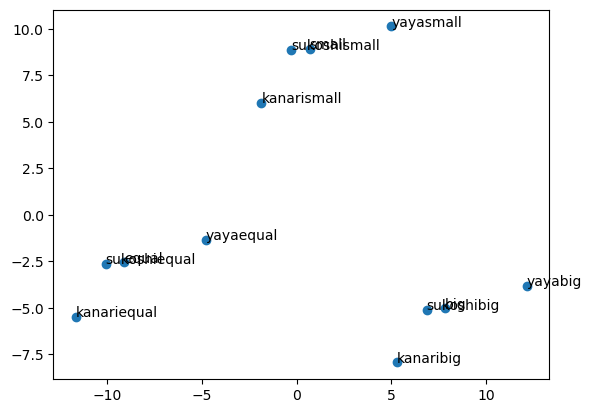

In [7]:
plt.scatter(i[0],i[1])

for n in range(len(i.index)):
    plt.text(i[0][n],i[1][n],i["label"][n])

以下、tsvデータ作成

In [3]:
import csv

vectors = [[1.01290,-0.83409,0.13104,2.02116,-0.25039,0.47885,0.38355,0.92374,1.27275,-0.29947,0.56659,-0.28971,0.19602,-0.46049,0.02004,-0.18841,0.89723,0.43796,-0.13247,-1.06122,1.85496,-1.62609,0.32588,0.59284,0.32755,-0.88746,-0.08220,0.06487,0.52004,1.70800,2.44082,-1.72287,0.42389,1.19258,0.40409,0.25709,0.91731,0.22898,0.46593,-0.21177,-0.26756,0.14688,0.80631,1.02596,1.25740,0.73082,0.58526,-0.10061,0.05217,0.14721,0.24326,-0.60736,1.05891,0.05943,0.54899,0.78894,0.50468,-0.27612,1.20690,1.78458,-0.19142,0.03962,0.50081,-1.04811,1.09763,1.10187,0.91001,1.15622,0.64666,-0.70944,-0.52902,-2.80140,1.37318,-1.20367,0.39205,0.54674,-1.60341,-0.21607,1.39842,-0.83229,1.70183,-0.30457,-0.61433,-1.15429,0.08707,-0.44350,1.48340,0.90082,-0.76283,0.09754,0.02608,2.32166,-1.74303,1.64921,-1.43667,0.18904,0.35760,-2.37468,0.19949,-1.48405,0.33178,1.64635,1.33208,-0.00607,1.06364,1.42819,1.15116,-0.21559,0.81197,-0.91738,0.39193,-1.57400,-0.48035,-0.61990,-1.88709,0.04510,0.07415,-0.14332,0.46414,0.49996,0.78878,0.74345,0.18119,0.72269,0.36413,-0.17450,-0.79204,0.26764], [-0.61047,-2.46814,1.58143,-0.99273,-1.72480,0.40729,0.44851,-0.72611,-2.73523,0.81400,0.22369,-0.93111,0.51710,1.90944,-1.62107,-0.52717,0.96806,0.17999,-0.18096,-0.87381,0.45670,0.36443,0.50109,0.91288,-0.81413,-2.37219,-0.06663,-0.29060,-0.14672,0.83424,-1.87530,-1.13816,-2.27519,-0.24432,-0.09771,1.80683,0.71487,1.74420,-0.52202,0.00408,0.22286,0.93779,0.43978,-0.59344,1.14194,-1.16028,0.39546,0.06057,-0.84302,-0.52485,0.41455,-1.11897,-0.87254,0.64305,2.14074,0.23975,-0.69272,-1.36607,-0.66664,-2.08699,0.78280,0.67690,-0.47932,-1.09430,0.49925,0.69936,-0.08714,-1.02385,0.91235,0.32029,-0.32728,2.54021,0.11005,1.87449,-0.20610,1.08530,-0.08897,0.11693,-0.29263,1.44921,0.94386,-0.67330,-0.38781,0.63956,-0.92174,0.74480,-0.50576,-0.93290,0.00564,2.09996,-0.93974,-1.43477,0.82770,-0.54892,-0.43120,-0.79670,-0.09989,-2.77013,1.81737,1.08305,1.16872,0.98312,2.11691,0.16686,-0.33195,0.82488,-0.10111,0.37487,0.51376,-0.11586,0.83126,0.69173,-0.36729,-0.66329,-0.69545,1.98468,-0.57992,-0.41719,-1.07709,0.67203,-0.92142,0.51117,-0.74608,0.94170,0.47996,-1.59103,-0.98783,1.25004], [0.59470,-0.19745,0.46962,-0.69414,-0.78872,0.49862,0.26877,-0.45866,0.68078,0.37569,-0.14940,1.12259,0.27509,0.41066,-1.07810,1.80164,0.75604,0.53835,-1.29030,1.31852,1.01123,-1.63460,-1.59284,0.28059,0.41384,-1.13342,-0.57292,-0.21426,0.17237,0.05833,-0.12551,1.57349,0.53875,-0.55744,0.54283,-0.65527,0.98008,-1.14003,-1.01649,-1.44039,-0.46450,1.87463,0.02232,-0.67587,0.05307,0.40427,-0.05054,1.68931,0.31991,-0.99517,-0.78086,0.76114,1.05217,0.36268,0.75198,0.72820,-0.48605,-0.63964,0.16605,-1.22744,0.43526,0.87928,-1.10384,-0.02662,-1.06348,-0.33816,0.93865,1.16787,-0.73143,-0.16525,0.17607,-0.22083,-0.85182,-0.98693,-1.05298,-0.48465,0.55984,0.08240,-0.18124,-0.76426,-1.11127,-1.72158,0.04380,0.69985,0.76393,0.39818,1.10441,0.17691,0.23050,-0.37789,-1.09683,-0.06937,-0.85553,-0.73487,-0.29158,-0.99653,0.12725,-0.45631,-1.49720,0.40092,0.05429,-1.66968,0.47116,2.04723,0.08816,1.04192,0.36929,0.75684,0.44207,-0.11875,-0.67779,0.02233,-1.27214,-0.45590,1.42445,0.57361,-1.59466,-2.35444,-0.89337,0.43392,1.51779,-0.43831,0.95488,-1.25019,0.77940,0.50720,-2.44501,1.35571], [1.01033,-0.45023,-0.09111,1.03803,-0.06236,0.13363,-2.21593,0.51135,0.75926,-0.51917,1.37405,-0.38308,1.48866,0.30347,-0.64831,-0.07996,1.45153,1.19581,-0.06503,-1.21821,3.22805,-0.02335,-0.72963,-1.08839,-0.01838,-0.89678,0.61535,0.00765,-1.00183,1.22838,3.30022,-0.07340,1.04592,2.42536,0.22658,0.90294,0.51228,-0.84068,0.58469,-0.08345,-1.38750,-1.18599,1.68206,2.41000,1.52997,1.10236,1.84250,-0.11092,-0.55144,1.24766,-0.95703,1.30157,-0.38085,0.60561,1.39723,2.07684,0.27896,-0.26279,1.66080,2.02988,0.31714,-0.77167,1.00096,0.45778,2.04709,1.40799,0.74020,3.08302,3.56750,-1.32141,0.29757,-3.95947,0.37735,-2.21548,0.25498,-0.22892,-2.18820,0.66256,-0.14983,-1.69746,1.81353,-0.04975,-0.08033,-0.60393,-0.39845,0.53722,2.01139,0.59079,-0.07646,1.18617,1.43489,3.29789,-3.56838,2.17336,0.25063,-0.77089,-0.28653,-2.24443,-0.71589,-0.65573,0.59059,1.71684,1.72115,0.68704,0.59325,3.35897,1.84854,-0.76319,2.44416,-0.92221,-0.51550,-0.74940,2.40372,-0.27169,-1.91987,0.16124,-1.20582,0.88283,1.08652,1.25275,2.60026,2.11816,-0.60905,-1.55442,1.43881,-1.51352,-0.30417,-0.10846], [-0.61304,-2.08427,1.35928,-1.97586,-1.53677,0.06207,-2.15097,-1.13850,-3.24872,0.59430,1.03115,-1.02449,1.80974,2.67340,-2.28941,-0.41872,1.52236,0.93784,-0.11351,-1.03080,1.82979,1.96717,-0.55442,-0.76835,-1.16006,-2.38150,0.63092,-0.34782,-1.66859,0.35462,-1.01589,0.51131,-1.65316,0.98846,-0.27522,2.45268,0.30984,0.67454,-0.40326,0.13239,-0.89709,-0.39508,1.31552,0.79060,1.41450,-0.78875,1.65270,0.05026,-1.44663,0.57560,-0.78574,0.78996,-2.31230,1.18923,2.98898,1.52765,-0.91845,-1.35274,-0.21273,-1.84168,1.29136,-0.13439,0.02083,0.41160,1.44870,1.00549,-0.25695,0.90295,3.83319,-0.29168,0.49931,1.38214,-0.88578,0.86269,-0.34317,0.30964,-0.67376,0.99556,-1.84089,0.58403,1.05556,-0.41847,0.14618,1.18993,-1.40726,1.72552,0.02223,-1.24293,0.69201,3.18860,0.46907,-0.45854,-0.99765,-0.02477,1.25610,-1.75663,-0.74402,-2.63988,0.90200,1.91137,1.42753,1.05361,2.50598,0.85997,-0.80234,2.75567,0.59628,-0.17274,2.14594,-0.12069,-0.07617,1.51632,2.51678,-0.31509,-0.72822,2.10082,-1.85988,0.60896,-0.45471,1.42482,0.89006,1.88589,-1.53632,-1.33540,1.55464,-2.93005,-0.49996,0.87394], [0.59213,0.18641,0.24747,-1.67727,-0.60069,0.15339,-2.33071,-0.87105,0.16729,0.15599,0.65806,1.02922,1.56773,1.17463,-1.74645,1.91009,1.31034,1.29620,-1.22286,1.16152,2.38432,-0.03186,-2.64835,-1.40064,0.06791,-1.14273,0.12462,-0.27148,-1.34950,-0.42129,0.73389,3.22296,1.16077,0.67534,0.36532,-0.00942,0.57505,-2.20969,-0.89773,-1.31207,-1.58445,0.54176,0.89807,0.70817,0.32563,0.77581,1.20670,1.67901,-0.28370,0.10528,-1.98115,2.67007,-0.38758,0.90885,1.60022,2.01611,-0.71178,-0.62631,0.61996,-0.98214,0.94382,0.06799,-0.60370,1.47928,-0.11403,-0.03204,0.76884,3.09467,2.18941,-0.77721,1.00266,-1.37889,-1.84765,-1.99874,-1.19005,-1.26031,-0.02495,0.96103,-1.72950,-1.62943,-0.99957,-1.46676,0.57779,1.25022,0.27841,1.37889,1.63239,-0.13311,0.91687,0.71074,0.31198,0.90685,-2.68088,-0.21072,1.39572,-1.95646,-0.51688,-0.32605,-2.41257,1.22924,0.31310,-1.59919,0.86022,2.74033,-0.38223,2.97271,1.06668,0.20924,2.07425,-0.12358,-1.58523,0.84693,1.61193,-0.10770,1.39167,0.68975,-2.87463,-1.32829,-0.27099,1.18671,3.32927,0.93640,0.16464,-3.52729,1.85408,-0.83181,-1.95714,0.97961], [0.86172,-2.24471,1.54977,3.84441,1.62051,0.17939,0.49467,0.47749,-0.22848,0.59239,0.31074,-2.03099,1.12643,-1.25755,-0.88281,-1.53947,0.31815,-1.41730,0.54242,-0.39087,-0.24130,-1.23917,-0.24531,0.68827,0.98190,0.02529,-0.11146,-1.79968,-1.57849,1.98588,3.39188,0.04758,2.74306,-0.01913,0.37115,-2.12449,-0.34683,-1.28758,1.27413,0.06209,-0.71531,-0.50134,-0.90318,2.25737,0.94268,-1.69605,1.78231,0.11719,1.01776,1.29466,0.51223,-1.87162,0.87238,1.60971,2.13915,0.53184,1.63458,0.19981,2.22084,2.36066,0.10530,-0.93016,1.22832,-2.16883,1.06891,1.41645,1.60150,1.77354,2.02627,-2.05820,-0.61014,-5.32306,3.20511,0.59013,2.59548,0.26917,-3.27381,-0.00593,3.05795,0.79623,-0.08346,-1.39675,-1.04003,-2.17249,0.46730,-2.35245,4.57899,2.62477,-1.46009,-0.24873,-0.96376,2.68265,-2.16934,-1.32751,-2.58807,-0.61525,1.16457,-3.16543,0.93122,-1.61156,1.89983,3.36150,0.45010,-1.20084,-0.18401,1.80943,0.04657,1.33444,0.02494,-1.39236,1.30404,-0.75746,-0.86871,1.20890,0.39646,-0.41595,1.43559,-0.89416,-1.27226,1.17731,0.27691,-0.00940,-0.67496,2.20532,0.81602,-0.25354,-1.10027,0.31834], [-0.76165,-3.87875,3.00016,0.83051,0.14610,0.10783,0.55963,-1.17236,-4.23646,1.70586,-0.03216,-2.67240,1.44752,1.11238,-2.52391,-1.87823,0.38898,-1.67527,0.49394,-0.20345,-1.63956,0.75136,-0.07010,1.00830,-0.15977,-1.45943,-0.09589,-2.15515,-2.24525,1.11212,-0.92424,0.63228,0.04398,-1.45602,-0.13065,-0.57475,-0.54928,0.22764,0.28618,0.27794,-0.22489,0.28956,-1.26972,0.63797,0.82722,-3.58715,1.59251,0.27837,0.12257,0.62260,0.68353,-2.38323,-1.05907,2.19333,3.73090,-0.01735,0.43717,-0.89014,0.34730,-1.51090,1.07953,-0.29288,0.24819,-2.21501,0.47052,1.01394,0.60434,-0.40653,2.29196,-1.02847,-0.40840,0.01855,1.94198,3.66829,1.99733,0.80773,-1.75938,0.32707,1.36689,3.07772,-0.84143,-1.76547,-0.81351,-0.37863,-0.54151,-1.16414,2.58984,0.79105,-0.69162,1.75370,-1.92958,-1.07378,0.40140,-3.52564,-1.58261,-1.60100,0.70708,-3.56088,2.54911,0.95554,2.73678,2.69828,1.23493,-1.02790,-1.57960,1.20612,-1.20570,1.92489,-0.27327,-0.59084,1.74337,1.50827,-0.75565,1.16551,1.58810,1.52363,0.78152,-1.16803,-2.81349,1.34938,-1.43329,-0.24168,-1.60223,2.42434,0.93185,-1.67007,-1.29606,1.30073], [0.44352,-1.60807,1.88835,1.12910,1.08218,0.19915,0.37989,-0.90491,-0.82045,1.26755,-0.40525,-0.61869,1.20551,-0.38640,-1.98095,0.45057,0.17697,-1.31691,-0.61541,1.98887,-1.08503,-1.24768,-2.16403,0.37602,1.06820,-0.22066,-0.60219,-2.07881,-1.92616,0.33621,0.82554,3.34394,2.85791,-1.76914,0.50989,-3.03685,-0.28406,-2.65659,-0.20828,-1.16653,-0.91225,1.22640,-1.68717,0.55554,-0.26165,-2.02260,1.14651,1.90712,1.28550,0.15228,-0.51188,-0.50312,0.86564,1.91295,2.34215,0.47110,0.64385,-0.16371,1.17999,-0.65136,0.73198,-0.09050,-0.37634,-1.14733,-1.09221,-0.02358,1.63013,1.78519,0.64818,-1.51400,0.09496,-2.74248,0.98010,0.80687,1.15046,-0.76222,-1.11056,0.29254,1.47828,0.86426,-2.89656,-2.81376,-0.38190,-0.31834,1.14417,-1.51077,4.20000,1.90087,-0.46676,-0.72416,-2.08667,0.29161,-1.28183,-3.71159,-1.44298,-1.80082,0.93422,-1.24705,-0.76547,0.27341,1.62234,0.04548,-0.41083,0.85246,-1.15949,1.42316,-0.73530,2.30687,-0.34496,-0.59374,0.23431,0.83887,-1.66050,1.37290,3.70799,0.11256,-0.23322,-3.10528,-2.62978,1.11127,1.00592,-1.19116,0.09873,0.23245,1.23129,0.42817,-2.75324,1.40641], [1.21617,1.26457,1.25397,0.84628,0.88784,1.16708,-0.26833,1.60207,-0.81876,-1.24414,0.66112,-1.42684,0.46781,-1.59919,-0.63947,0.51089,1.65252,0.30148,-1.33998,-1.55392,1.41644,0.60424,0.13652,0.46845,1.16041,-0.88854,-1.80502,-0.44973,-1.20592,1.82092,3.32351,-1.93459,-0.55849,2.35968,2.53509,0.40698,1.82724,-0.39692,0.01447,-0.19044,-1.17475,-1.14050,0.14128,-0.07481,2.36085,-1.73205,-0.04739,-0.65324,-0.16542,-2.65628,-0.24141,-1.10754,1.55076,0.66394,1.12292,1.22119,0.52156,0.06832,1.80208,2.68135,-0.90586,1.55439,1.33257,-2.21379,0.01370,0.28839,0.62422,1.30232,-0.55813,-0.07497,-1.45458,-4.28077,3.09829,-3.98680,1.01273,2.17456,-1.59148,-1.39584,0.81194,-0.87764,-0.44260,-0.58811,-1.42559,-1.25268,1.07222,0.55148,1.92170,-1.00483,-0.35074,0.10174,1.40171,3.00924,-3.53543,3.57843,-2.02737,-0.12047,1.47581,-0.50016,-0.62679,-0.59645,0.76584,0.02489,0.69125,1.64977,1.77985,0.24232,-0.80007,-0.39807,0.59856,-0.63779,1.83718,-3.11562,0.40108,-2.17265,-2.03038,0.28355,0.20224,-0.07020,0.22445,0.83137,-0.61417,0.98019,-0.13035,-0.44652,-0.11255,-0.35548,-0.20002,0.18701], [-0.40720,-0.36947,2.70435,-2.16761,-0.58657,1.09553,-0.20337,-0.04778,-4.82674,-0.13067,0.31822,-2.06824,0.78890,0.77075,-2.28057,0.17213,1.72335,0.04351,-1.38846,-1.36651,0.01818,2.59476,0.31173,0.78849,0.01874,-2.37327,-1.78945,-0.80520,-1.87268,0.94716,-0.99261,-1.34988,-3.25757,0.92279,2.03328,1.95672,1.62479,1.11831,-0.97348,0.02540,-0.68433,-0.34959,-0.22526,-1.69421,2.24539,-3.62316,-0.23720,-0.49205,-1.06061,-3.32834,-0.07012,-1.61915,-0.38069,1.24755,2.71467,0.67200,-0.67585,-1.02163,-0.07145,-1.19021,0.06836,2.19167,0.35245,-2.25998,-0.58469,-0.11412,-0.37293,-0.87775,-0.29244,0.95477,-1.25284,1.06084,1.83516,-0.90864,0.41458,2.71311,-0.07705,-1.06284,-0.87912,1.40385,-1.20057,-0.95683,-1.19907,0.54117,0.06341,1.73978,-0.06745,-2.83855,0.41773,2.10417,0.43589,-0.74719,-0.96470,1.38030,-1.02191,-1.10621,1.01832,-0.89561,0.99109,1.97065,1.60278,-0.63834,1.47608,1.82270,0.38426,-0.36098,-2.05234,0.19238,0.30034,0.16373,2.27651,-0.84989,0.51414,-2.21604,-0.83873,2.22313,-0.45182,-0.34407,-1.31678,1.00344,-2.32436,0.74791,-1.05762,-0.22751,0.00328,-1.77201,-0.39581,1.16940], [0.79798,1.90121,1.59254,-1.86902,0.34951,1.18685,-0.38311,0.21967,-1.41073,-0.56898,-0.05487,-0.01453,0.54689,-0.72803,-1.73761,2.50094,1.51133,0.40187,-2.49781,0.82582,0.57271,0.59573,-1.78220,0.15620,1.24670,-1.13450,-2.29574,-0.72886,-1.55359,0.17125,0.75718,1.36177,-0.44363,0.60967,2.67382,-0.50538,1.89001,-1.76592,-1.46794,-1.41906,-1.37169,0.58725,-0.64271,-1.77664,1.15652,-2.05860,-0.68320,1.13669,0.10232,-3.79866,-1.26553,0.26096,1.54403,0.96718,1.32592,1.16045,-0.46918,-0.29520,0.76124,-0.33067,-0.27918,2.39405,-0.27208,-1.19230,-2.14742,-1.15165,0.65286,1.31398,-1.93622,0.46923,-0.74949,-1.70020,0.87329,-3.77006,-0.43230,1.14317,0.57177,-1.09737,-0.76773,-0.80961,-3.25570,-2.00512,-0.76746,0.60146,1.74908,1.39315,1.54271,-1.72874,0.64259,-0.37369,0.27880,0.61821,-2.64793,1.19435,-0.88229,-1.30604,1.24546,1.41821,-2.32348,1.28852,0.48835,-3.29114,-0.16967,3.70306,0.80437,-0.14394,-1.58194,0.57436,0.22865,0.16084,0.76745,-1.51929,-0.39071,-2.00865,1.28116,0.81206,-1.46657,-2.28132,-1.13306,0.76533,0.11484,-0.20157,0.64334,-2.41940,0.30272,0.32623,-1.85299,1.27508]]       # load your embeddings
metadata = ['big', 'equal', 'small', 'yayabig', 'yayaequal', 'yayasmall', 'sukoshibig', 'sukoshiequal', 'sukoshismall', 'kanaribig', 'kanariequal', 'kanarismall']  # load your metadata

with open('output.tsv', 'wt') as out_file:
    tsv_writer = csv.writer(out_file, delimiter='\t')
    for vector in vectors:
      tsv_writer.writerow(vector)

with open('metadata.tsv', 'wt') as out_file:
    tsv_writer = csv.writer(out_file, delimiter='\t')
    for meta in metadata:
      tsv_writer.writerow([meta])